# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

In [ ]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [ ]:
import requests
import bs4
from bs4 import BeautifulSoup

In [ ]:
## YOUR CODE HERE
r = requests.get(URL)

In [ ]:
r

In [ ]:
# Inconsistent indexing
job2 = bs.select('a[itemprop="title"]')
job2[3].text

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

In [ ]:
bs = BeautifulSoup(r.text, 'lxml')

#### Testing locations

In [ ]:
location = bs.select('span.location')
location[3].text

In [ ]:
company =  bs.select('span.company')
# company[3].text.strip()
company = [i.text.strip() for i in company]
company = pd.DataFrame(company)
company.columns = ['company']
company

In [ ]:
job = bs.select('a[data-tn-element="jobTitle"]')
# job[3].text
job = pd.DataFrame([i.text for i in job])
job.columns = ['job_title']
job


In [ ]:
# salary = bs.select('p[id="univsrch-salary-currentsalary"]')
salary = bs.select('.sjcl div')
salary[0].text.strip()
# salary[0].text.strip()
# .getText()


In [ ]:
# salary = bs.select('p[id="univsrch-salary-currentsalary"]')
salary = bs.select('.sjcl')
salary[2].text.strip()
# salary[0].text.strip()
# .getText()

In [ ]:
for i in salary:
    print i.text

In [ ]:
results = bs.findAll('div',{"class" : "sjcl"}, 'div')
results[2]

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

### The scraped data was only 2% of the example provided dataset. 

# Data Analysis
For my data analysis, I will be using the example provided dataset, since the data that was scrpaed is only 2% of the example provided dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Predicting salaries using Logistic Regression

##### Load in the the data of scraped salaries

In [2]:
data = pd.read_csv('indeed-scraped-job-postings.csv')
data.head()

,city,company,salary,summary,title,parsed_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000


##### Creating a copy of the data frame

In [3]:
df = data

In [4]:
df.head()

,city,company,salary,summary,title,parsed_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000


In [5]:
df.shape

(4791, 6)

In [69]:
mean_cities = df.groupby('city').mean()
mean_cities_corr = mean_cities.corr()
print mean_cities
print mean_cities_corr

               parsed_salary  annual_salary  above_median       mgr    python
city                                                                         
Austin          17601.659828   71941.290563      0.263335  0.147706  0.000000
Chicago        127431.473191  127431.473191      0.664681  0.982128  0.334468
New+York       139601.542141  139601.542141      0.873016  0.814059  0.009070
San+Francisco  137589.797531  137866.834568      0.980247  0.920988  0.004938
Seattle         33968.235955   71005.792135      0.191011  0.067416  0.000000
               parsed_salary  annual_salary  above_median       mgr    python
parsed_salary       1.000000       0.992857      0.952231  0.965938  0.358213
annual_salary       0.992857       1.000000      0.974817  0.965038  0.307323
above_median        0.952231       0.974817      1.000000  0.915897  0.132835
mgr                 0.965938       0.965038      0.915897  1.000000  0.519507
python              0.358213       0.307323      0.132835  0.519

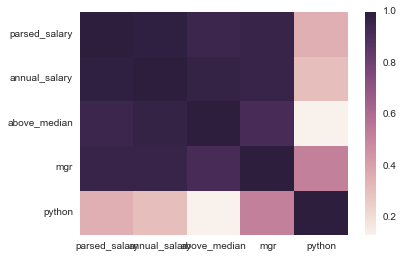

In [70]:
sns.heatmap(mean_cities_corr)

In [8]:
avg_salary = pd.DataFrame(pd.pivot_table(data=df, index='city', values='parsed_salary', aggfunc=np.mean))
avg_salary

,parsed_salary
city,
Austin,17601.659828
Chicago,127431.473191
New+York,139601.542141
San+Francisco,137589.797531
Seattle,33968.235955


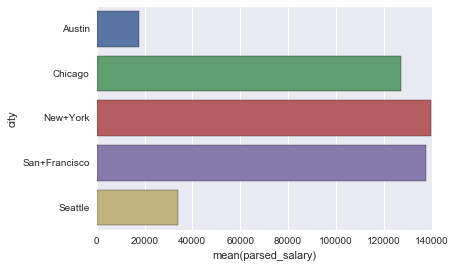

In [9]:
sns.barplot(data=avg_salary, x='parsed_salary', y=avg_salary.index)

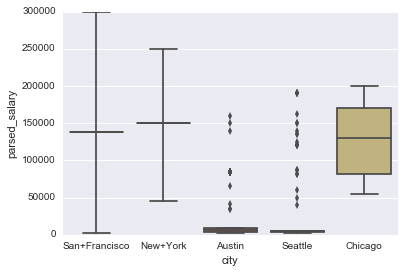

In [10]:
sns.boxplot(data=df, x='city', y='parsed_salary')

In [11]:
austin = df[ df['city'] == 'Austin' ]
austin.parsed_salary.value_counts()

5950.0      788
3210.0      783
8541.5      699
85000.0     392
8124.5        3
6806.0        2
2333.0        2
35000.0       2
4459.0        1
41000.0       1
8333.0        1
160000.0      1
65000.0       1
4714.0        1
140000.0      1
6388.0        1
150000.0      1
4966.0        1
Name: parsed_salary, dtype: int64

Most likely **Monthly** salaries

In [12]:
austin[ austin['parsed_salary'] == 5950.0 ]

,city,company,salary,summary,title,parsed_salary
852,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with processing and analyzing GNSS ...,Engineering Scientist Associate - GNSS Analyst...,5950
854,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Data analysis for space weather remediation. D...,Engineering Scientist Associate - R and D Soft...,5950
862,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Demonstrated ability related to data acquisiti...,Engineering Scientist Associate - Underwater R...,5950
866,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Demonstrated ability related to data acquisiti...,Engineering Scientist Associate - Underwater R...,5950
875,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with digital data distribution tech...,Engineering Scientist Associate - Software Def...,5950
878,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with digital data distribution tech...,Engineering Scientist Associate - Software Def...,5950
881,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with digital data distribution tech...,Engineering Scientist Associate - Software Def...,5950
884,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with digital data distribution tech...,Engineering Scientist Associate - Software Def...,5950
888,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Thorough understanding of object-oriented prog...,Engineering Scientist Associate - Software Eng...,5950
891,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Thorough understanding of object-oriented prog...,Engineering Scientist Associate - Software Eng...,5950


Confirmed that there are monthly salaries mixed in with annual salaries.

In [13]:
temp_salary = []
for i in df['parsed_salary']:
    if i < 15000:
        temp_salary.append(i*12)
    else: 
        temp_salary.append(i)

In [14]:
df['annual_salary'] = temp_salary

In [15]:
df.annual_salary.describe()

count      4789.000000
mean      97316.191585
std       41277.958111
min       27996.000000
25%       71400.000000
50%       85000.000000
75%      130000.000000
max      300000.000000
Name: annual_salary, dtype: float64

In [16]:
df[ df['city'] == 'Austin' ]

,city,company,salary,summary,title,parsed_salary,annual_salary
846,Austin,TechTank Staffing & Consulting Solutions,"$140,000 a year",What are we looking for in this Data Scientist...,Data Scientist Programmer/Specialist,140000.0,140000
847,Austin,University of Texas at Austin,"$8,333 a month",Development of tools for quantitative stratigr...,Research Scientist,8333.0,99996
848,Austin,University of Texas at Austin,"$6,250 - $10,833 a month","Knowledge of digital signal processing, image ...",Engineering Scientist - R and D Algorithm and ...,8541.5,102498
849,Austin,University of Texas at Austin,"$6,806 a month","Solve problems encountered in interpretation, ...",Research Engineering/ Scientist Associate IV,6806.0,81672
850,Austin,All-In Analytics,"$140,000 - $160,000 a year",Senior Deep Learning Data Scientist. Forecasti...,Senior Deep Learning Data Scientist,150000.0,150000
851,Austin,University of Texas at Austin,"$7,083 - $9,166 a month",Provide technical and research focused leaders...,Research Associate - R and D Data Scientist,8124.5,97494
852,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Experience with processing and analyzing GNSS ...,Engineering Scientist Associate - GNSS Analyst...,5950.0,71400
853,Austin,Texas Department of Public Safety,"$3,763 - $5,665 a month","Develop plans, policies, and procedures for an...","Statistician III-IV, HSOC, THP-Austin",4714.0,56568
854,Austin,University of Texas at Austin,"$5,400 - $6,500 a month",Data analysis for space weather remediation. D...,Engineering Scientist Associate - R and D Soft...,5950.0,71400
855,Austin,University of Texas at Austin,"$6,806 a month","Solve problems encountered in interpretation, ...",Research Engineering/ Scientist Associate IV,6806.0,81672


In [17]:
print df.annual_salary.median()
print df.annual_salary.mean()

85000.0
97316.1915849


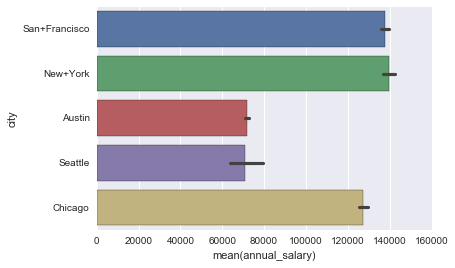

In [21]:
sns.barplot(data=df, x='annual_salary', y='city')

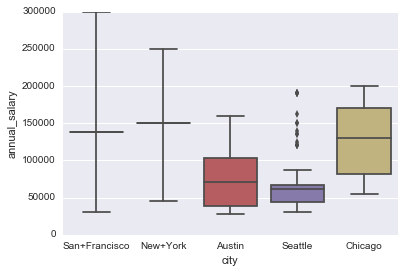

In [20]:
sns.boxplot(data=df, x='city', y='annual_salary')

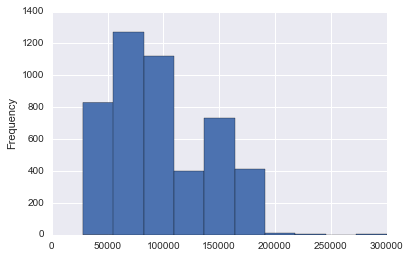

In [22]:
df.annual_salary.plot(kind='hist')

In [71]:
df.annual_salary.describe()

count      4789.000000
mean      97316.191585
std       41277.958111
min       27996.000000
25%       71400.000000
50%       85000.000000
75%      130000.000000
max      300000.000000
Name: annual_salary, dtype: float64

In [24]:
df.dtypes

city              object
company           object
salary            object
summary           object
title             object
parsed_salary    float64
annual_salary    float64
dtype: object

In [25]:
df.city = df.city.astype('str')

In [26]:
df.dtypes

city              object
company           object
salary            object
summary           object
title             object
parsed_salary    float64
annual_salary    float64
dtype: object

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [27]:
df.head()

,city,company,salary,summary,title,parsed_salary,annual_salary
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000,180000
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000,155000
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000,100000
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000,165000
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000,140000


In [28]:
df.dtypes

city              object
company           object
salary            object
summary           object
title             object
parsed_salary    float64
annual_salary    float64
dtype: object

In [29]:
for i in df.summary[:5]:
    print type(i)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


#### Thought experiment: What is the baseline accuracy for this model?

In [30]:
## YOUR CODE HERE
df['above_median'] = df['annual_salary'].map(lambda x: 1 if x > df['annual_salary'].median() else 0)

In [31]:
df['above_median'].value_counts()

0    2505
1    2286
Name: above_median, dtype: int64

In [32]:
df['above_median'].mean()

0.4771446462116468

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [33]:
import patsy
formula = 'above_median ~ C(city)'
y, X = patsy.dmatrices(formula, data=df)

In [34]:
X

DesignMatrix with shape (4791, 5)
  Columns:
    ['Intercept',
     'C(city)[T.Chicago]',
     'C(city)[T.New+York]',
     'C(city)[T.San+Francisco]',
     'C(city)[T.Seattle]']
  Terms:
    'Intercept' (column 0), 'C(city)' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

In [35]:
print y.shape
print X.shape

(4791, 1)
(4791, 5)


In [36]:
import statsmodels.api as sm

logit = sm.Logit(y, X) # Logit instead of OLS

result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.531355
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit               Pseudo R-squared:    0.232    
Dependent Variable:    above_median        AIC:                 5101.4417
Date:                  2016-07-05 08:07    BIC:                 5133.8142
No. Observations:      4791                Log-Likelihood:      -2545.7  
Df Model:              4                   LL-Null:             -3315.9  
Df Residuals:          4786                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        8.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -1.0287   0.0438 -23.4601 0.0000 -1.1147 -0.9428
C(city)[T.Chicago]        1.7129   0.0758  22.6067 0.0000  1.5644  1.8614
C(city)[T.New+York]       2.9566   0.1496  19.7646 0.0000  2.6634  3.2498
C(city)[T.San+Francisco]  4.9332   0.3598  13.7117 0.0000  4.2280  5.6384
C(city)[T.Seattle]       -0.4147   0.2732  -1.5181 0.1290 -0.9502  0.1207
=========================================================================

"""

In [37]:
y.mean()

array(0.4771446462116468)

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [38]:
df.head()

,city,company,salary,summary,title,parsed_salary,annual_salary,above_median
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000,180000,1
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000,155000,1
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000,100000,1
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000,165000,1
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000,140000,1


In [39]:
temp_mgr = []
for i in df['title']:
        if 'Senior' in i:
            temp_mgr.append(1)
        elif 'Manager' in i:
            temp_mgr.append(1)
        elif 'VP' in i:
            temp_mgr.append(1)
        elif 'Vice President' in i:
            temp_mgr.append(1)
        elif 'Director' in i:
            temp_mgr.append(1)
        elif 'SR.' in i:
            temp_mgr.append(1)
        else:
            temp_mgr.append(0)
# print temp_mgr
df['mgr'] = temp_mgr

In [40]:
df.mgr.sum()

2288

In [41]:
formula = 'above_median ~ C(city) + mgr'
y, X = patsy.dmatrices(formula, data=df)

In [42]:
logit = sm.Logit(np.ravel(y), X) # Logit instead of OLS

result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.391758
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit               Pseudo R-squared:    0.434    
Date:                  2016-07-05 08:07    AIC:                 3765.8246
No. Observations:      4791                BIC:                 3804.6716
Df Model:              5                   Log-Likelihood:      -1876.9  
Df Residuals:          4785                LL-Null:             -3315.9  
Converged:             1.0000              LLR p-value:         0.0000   
No. Iterations:        8.0000              Scale:               1.0000   
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -1.7867   0.0593 -30.1477 0.0000 -1.9029 -1.6706
C(city)[T.Chicago]       -2.3161   0.2220 -10.4341 0.0000 -2.7512 -1.8811
C(city)[T.New+York]       1.2724   0.2150   5.9187 0.0000  0.8511  1.6938
C(city)[T.San+Francisco]  3.0319   0.3999   7.5822 0.0000  2.2481  3.8156
C(city)[T.Seattle]       -0.0623   0.3212  -0.1940 0.8462 -0.6918  0.5672
mgr                       4.8405   0.2176  22.2468 0.0000  4.4140  5.2669
=========================================================================

"""

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
formula = 'above_median ~ C(city) + mgr'
y, X = patsy.dmatrices(formula, data=df)

In [45]:
logit = LogisticRegression()
logit.fit(X, y)
y = np.ravel(y)
print logit.score(X, y)

0.838029638906


/Users/isaacmoore/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [46]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.33)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3209, 6), (1582, 6), (3209,), (1582,))

In [49]:
logit.fit(X_train, y_train)
logit_reg = logit.coef_
logit_score = logit.score(X_test, y_test)
print logit_reg
print logit_score

[[-0.84237537 -2.18866925  1.0289428   2.52341479 -0.11419836  4.59954168]]
0.845132743363


Model improved by incorporating train/test split.

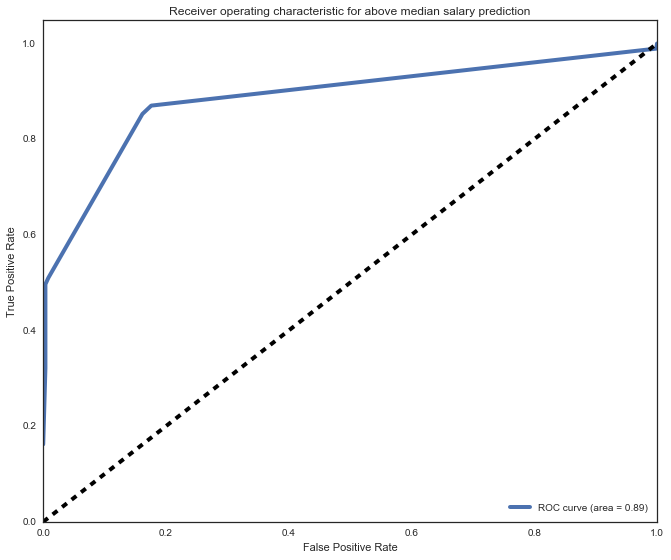

In [50]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-white')


y_score = logit.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for above median salary prediction')
plt.legend(loc="lower right")
plt.show()

In [51]:
df

,city,company,salary,summary,title,parsed_salary,annual_salary,above_median,mgr
0,San+Francisco,MarkMonitor,"$180,000 a year","Data skills (SQL, Hive, Pig). Applying machine...",Data Scientist,180000,180000,1,0
1,San+Francisco,Workbridge Associates,"$130,000 - $180,000 a year",3+ years of industry experience in a data scie...,Senior Data Scientist,155000,155000,1,1
2,San+Francisco,Mines.io,"$80,000 - $120,000 a year",We are looking for a data scientist/developer ...,Full-Stack Data Scientist,100000,100000,1,0
3,San+Francisco,Workbridge Associates,"$150,000 - $180,000 a year",In this position you will share programming an...,Data Scientist,165000,165000,1,0
4,San+Francisco,Smith Hanley Associates,"$140,000 a year","This person will recruit, build and lead a tea...",Data Scientist,140000,140000,1,0
5,San+Francisco,HSF Consulting,"$300,000 a year",Teams included Data Services(including data en...,VP of Data Services,300000,300000,1,1
6,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000,125000,1,0
7,San+Francisco,Brilent,"$130,000 a year","Perform large-scale data analysis, find intere...",Senior Data Scientist,130000,130000,1,1
8,San+Francisco,HSF Consulting,"$160,000 a year",More data- they simply have more data than the...,Senior Data Scientist,160000,160000,1,1
9,San+Francisco,All-In Analytics,"$100,000 - $150,000 a year",Fraud Data Scientist. Seeking someone with ski...,Fraud Data Scientist,125000,125000,1,0


#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

L1

In [52]:
logit_l1 = LogisticRegression(penalty = 'l1')
logit_l1.fit(X_train, y_train)
logit_l1 = logit_l1.coef_
print logit_l1

[[-0.76211158 -2.47658064  0.98000583  2.83563835  0.          4.90213708]]


In [53]:
print 'Array Difference', logit_reg - logit_l1

Array Difference [[-0.08026378  0.28791139  0.04893697 -0.31222356 -0.11419836 -0.30259541]]


L2 (Default)

In [54]:
logit_l2 = LogisticRegression(penalty = 'l2')
logit_l2.fit(X_train, y_train)
logit_l2 = logit_l2.coef_
print logit_l2

[[-0.84237537 -2.18866925  1.0289428   2.52341479 -0.11419836  4.59954168]]


In [55]:
print logit.coef_

[[-0.84237537 -2.18866925  1.0289428   2.52341479 -0.11419836  4.59954168]]


#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

Incorporating Python from description as a variable to model.

In [56]:
temp_py = []
for i in df['summary']:
        if 'python' in i:
            temp_py.append(1)
        elif 'Python' in i:
            temp_py.append(1)
        else:
            temp_py.append(0)
# print temp_py
df['python'] = temp_py

In [57]:
df.python.sum()

399

In [58]:
formula = 'above_median ~ C(city) + python -1'
y, X = patsy.dmatrices(formula, data=df)

In [59]:
logit = sm.Logit(np.ravel(y), X) # Logit instead of OLS

result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.490549
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:               Logit               Pseudo R-squared:    0.291    
Date:                2016-07-05 08:07    AIC:                 4712.4438
No. Observations:    4791                BIC:                 4751.2907
Df Model:            5                   Log-Likelihood:      -2350.2  
Df Residuals:        4785                LL-Null:             -3315.9  
Converged:           1.0000              LLR p-value:         0.0000   
No. Iterations:      9.0000              Scale:               1.0000   
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
C(city)[Austin]        -1.0287   0.0438 -23.4601 0.0000 -1.1147 -0.9428
C(city)[Chicago]       -0.0051   0.0715  -0.0717 0.9428 -0.1453  0.1350
C(city)[New+York]       1.9175   0.1431  13.3985 0.0000  1.6370  2.1980
C(city)[San+Francisco]  3.8995   0.3571  10.9194 0.0000  3.1995  4.5994
C(city)[Seattle]       -1.4435   0.2697  -5.3530 0.0000 -1.9720 -0.9149
python                  5.2823   0.7125   7.4138 0.0000  3.8858  6.6788
=======================================================================

"""

There is an increase in prediction by adding python by .059, although this is still below the baseline. This still does not serve as a good prediction for salary above the median. Adding manager and python, to see if there is any additional change. 

In [60]:
formula = 'above_median ~ C(city) + python + mgr'
y, X = patsy.dmatrices(formula, data=df)

In [61]:
logit = sm.Logit(np.ravel(y), X) # Logit instead of OLS

result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.350997
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit               Pseudo R-squared:    0.493    
Date:                  2016-07-05 08:07    AIC:                 3377.2512
No. Observations:      4791                BIC:                 3422.5727
Df Model:              6                   Log-Likelihood:      -1681.6  
Df Residuals:          4784                LL-Null:             -3315.9  
Converged:             1.0000              LLR p-value:         0.0000   
No. Iterations:        9.0000              Scale:               1.0000   
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -1.7902   0.0593 -30.1672 0.0000 -1.9066 -1.6739
C(city)[T.Chicago]       -3.0697   0.2292 -13.3914 0.0000 -3.5190 -2.6204
C(city)[T.New+York]       1.2356   0.2175   5.6803 0.0000  0.8092  1.6619
C(city)[T.San+Francisco]  2.9912   0.4017   7.4456 0.0000  2.2038  3.7786
C(city)[T.Seattle]       -0.0605   0.3216  -0.1880 0.8509 -0.6908  0.5699
python                    5.6181   0.7525   7.4662 0.0000  4.1433  7.0929
mgr                       4.9037   0.2218  22.1042 0.0000  4.4689  5.3385
=========================================================================

"""

There is a change in effectiveness to predict salaries above the median, however the pseudo R-Ssquared score is still below the baseline, so this is still not a viable method for predicting salaries. Now to try with sklearn.

In [62]:
formula = 'above_median ~ C(city) + python + mgr'
y, X = patsy.dmatrices(formula, data=df)
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.33)
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

0.83375474083438683

*Very slight decrease, the score without python: 0.838029638906, vs. the score by adding python: 0.83754740834386854*

Graph of the ROC curve below to show sensitivity.

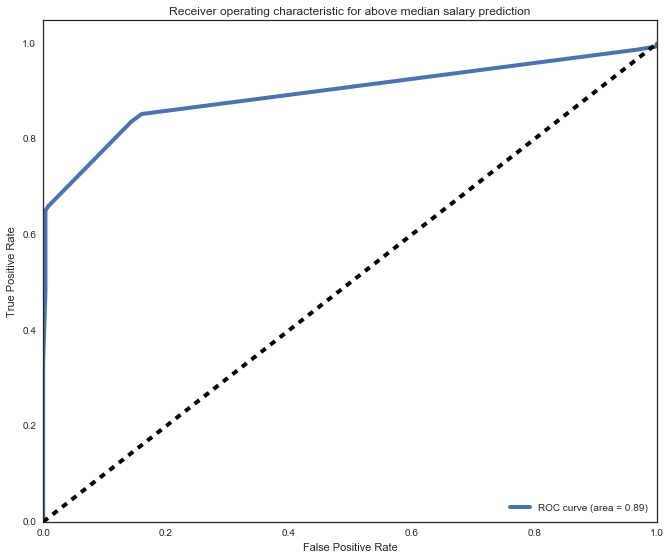

In [63]:
y_score = logit.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for above median salary prediction')
plt.legend(loc="lower right")
plt.show()

In [64]:
y_pred = logit.predict(X_test)
y_true = y_test

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=None)

array([[822,   7],
       [256, 497]])

From the confusion matrix above, the False Positive Rate (FPR) of 141 is greater than the False Negative Rate (FNR) of 11, this means that there are thirteen times as many Type 1 errors than there are Type 2 errors. This is represented by the very sharp incline of the blue line along the y-axis, which represents the Type 1 errors and the slow increase to the top right corner, which represents the Type 2 errors.  

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [66]:
## YOUR CODE HERE

In [67]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [68]:
## YOUR CODE HERE